# Backprop

**Prerequisites**

- Tensorflow
- SGD
- MLP

**Outcomes**

- Understand the backpropogation algorithm

## Review: MLP

- The multilayer perceptron is built up from sequential application of Dense network layers
- Each dense layer has the form $$D_l(x; W, b) = W x + b$$
- Following each layer we apply a non-linear activation function
- Model can be expressed using function composition notation: $$\hat{y} = \left(f_{\text{out}} \circ D_L \circ \cdots \circ f_2 \circ D_2 \circ f_1 \circ D_1 \right)(x)$$

### Some Notation

- Let's define a little bit more notation...
- Let the neuron vector for layer $l$ **before** the activation is applied be called $z_l$
- Let the neuron's value for layer $l$ **after** activations be $a_l = f_l(z_l)$
- Then, we have $$\begin{aligned}a_0 &= x \\ z_l &= W_l a_l + b_l \; \text{for }\; l \ge 1 \\ a_l &= f_l(z_l) \; \text{for } \; l \ge 1\end{aligned}$$

### How to find $W$ and $b$?

- We've relied on keras to `.fit` the models for us
- This means keras is able to solve the inverse problem and find values for all $W$ and $b$ tensors such that $\hat{y} \approx y$
- Keras has used variants of stochastic gradient descent to do this, but how...

## Backpropogation: How gradient descent optimizes $W$, $b$

- Let's dig deeper into how the weights and biases of our MLP are fit
- Let $l$ be the loss function
- In principle, we know that we are using gradient descent: $$\theta' = \theta - \alpha \frac{\partial l(y,\hat{y})}{\partial \theta}$$
- But what actually goes in to $\frac{\partial l}{\partial \theta}$?

### Video

- Let's watch a video together about how this works
- It is from the *excellent* 3Blue1Brown YouTube channel
- Thanks to the producer and check out the other videos on the channel


<iframe width="560" height="315" src="https://www.youtube.com/embed/tIeHLnjs5U8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

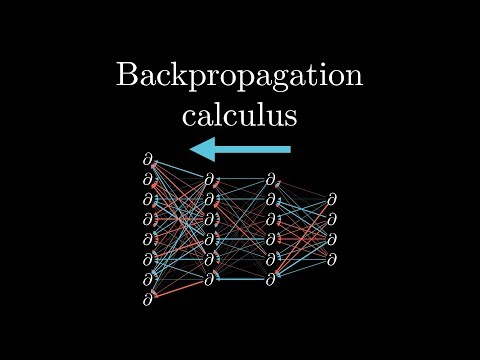

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("tIeHLnjs5U8", width=800, height=600)

### Takeaways

- Understanding the details of backpropogation is not necessary to do effective deep learning, but it sure helps!
- Thinking through the backprop process, we gain clarity into some things we've hinted at in previous lectures:
    - Saturated activations don't allow information to flow to earlier layers
    - Large activations can cause exploding gradients when multiplied in chain rule
    - Normalizing input features leads to better behaved neurons early in the network, which impacts stability later
    - ReLU can have problem of disappearing gradients -- if activation at later $l$ is negative, ReLU sets to zero and all layers before $l$ have 0 gradient
    - Others in this [blog post](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b)
    
    

### In practice

- In practice, we typically allow Tensorflow and its optimizers to handle the backprop for us
- However, we should be aware of how it works... it might save us from spending time on network architectures that simply won't work with backprop